# TP1 : Linear Classifier : Perceptron </br>
## Binome: <br/>
Imen Hrabi & <br/> </br>
Farah IbnelHaj Rhouma
## 1-  Working with perceptron algorithm

**Question 1.a:** <br/>
What is the computational/time complexity of the basic perceptron algorithm. <br/>
Please define the complexity as function of the variables defined in the provided algorithm: <br/>
    O(n*m) <br/>  <br/>
**Question 1.b:** <br/>
What is the space complexity of the basic perceptron algorithm. <br/>
Please define the complexity as function of the variables defined in the provided algorithm. <br/>
 S(p)= C+ Sp = 3 + n

## 1-  Implementation
**Generate data set**

In [191]:

# importing libraries
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 
def gen_dataset(sigma1):    
    # defining the mean
    mu1 = [-1,0]
    mu2 = [1,0]

    # The random module uses the seed value as a base
    # to generate a random number. If seed value is not
    # present, it takes the system’s current time.
    np.random.seed(0)


    X11 = np.random.normal(mu1[0], sigma1, (125, 1)) 
    X12 = np.random.normal(mu1[1], sigma1, (125,1))
    X1= np.column_stack([np.ones(125),X11,X12])

    X21 = np.random.normal(mu2[0], sigma1, (125, 1))
    X22 = np.random.normal(mu2[1], sigma1, (125,1))
    X2= np.column_stack([np.ones(125),X21,X22])


    Y1 = np.full((125, 1), -1)
    Y2 = np.full((125, 1), 1)
    Y = np.concatenate((Y1,Y2),axis=0)

    dataset = np.concatenate((np.column_stack([X1,Y1]),np.column_stack([X2,Y2])),axis=0)
    data = np.concatenate((X1,X2),axis=0)

    # plot a graph
    plt.scatter(X11, X12, color = 'b')
    plt.scatter(X21, X22, color = 'y')
    plt.show()
    return data , Y


**implement the perceptron algorithm**

In [199]:
from sklearn import datasets
from sklearn.model_selection import train_test_split


def perceptron(X_train,Y_train) :
    n_iterations = 1000
    weights = np.zeros(3)

    for _ in range(n_iterations):
        for xi, expected_value in zip(X_train, y_train):
            if  expected_value * np.dot(weights, xi)<=0 :
                weights1 = weights + expected_value * xi
        if np.array_equal( weights1 ,weights) :
            break
        weights = weights1

    print (weights)
    x0_1 = np.amin(X_train[:, 1])
    x0_2 = np.amax(X_train[:, 1])

    x1_1 = (-weights[1] * x0_1 - weights[0]) / weights[2]
    x1_2 = (-weights[1] * x0_2 - weights[0]) / weights[2]

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    
    col = np.where(Y_train[:, 0]<1,'b',"y")
    plt.scatter(X_train[:, 1], X_train[:, 2], color = col)
    ax.plot([x0_1, x0_2], [x1_1, x1_2], "g")

    
    ymin = np.amin(X_train[:, 2])
    ymax = np.amax(X_train[:, 2])
    ax.set_ylim([ymin -1, ymax + 1 ])

    plt.show()
    return weights

In [228]:
def predict(X_test,y_test , weights):
    n_samples, n_features = X_test.shape
    err = 0
    for X_test, expected_value in zip(X_test, y_test):
        y = np.dot(X_test,weights)
        if expected_value *  y <=0 :
            err= err + 1/n_samples
    return err


**2-2 Experiements**  <br/><br/>
**Experiment 1** <br/>
**Q1:** Does the algorithm converge? Why ? <br/><br/>
the algorithm does not converge because the items are not linearily separated ,
there are 2 items red in the field of blue and 2 items blue in the red field
<br/><br/>
**Q2:** Plot the decision boundary found by your algorithm. Is this decision boundary unique? <br/><br/>
this decision boundary is not unique
Does changing the initialisation change the result of the algorithm? <br/>
The initialisation does not change the result of the algorithm, it changes the time of the algorithm but not the result

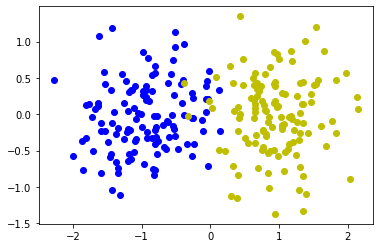

[0.         3.98966546 0.42457523]


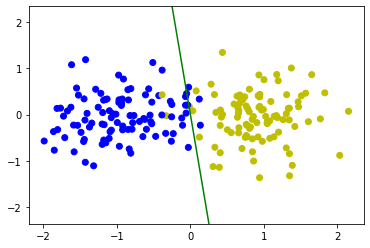

In [233]:
data , Y =gen_dataset(math.sqrt(0.25))
X_train, X_test, y_train, y_test = train_test_split(data, Y, test_size=0.2, random_state=42, stratify=Y)
weights=perceptron(X_train,y_train)

**Question 3 :** Compute the accuracy of the classification on the test set. Plot the decision boundary on the test set

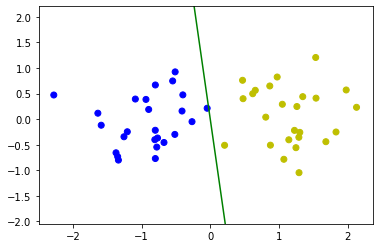

accuracy =  1


In [235]:
accuracy = 1 -predict(X_test,y_test , weights)


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

x0_1 = np.amin(X_train[:, 1])
x0_2 = np.amax(X_train[:, 1])

x1_1 = (-weights[1] * x0_1 - weights[0]) / weights[2]
x1_2 = (-weights[1] * x0_2 - weights[0]) / weights[2]

col = np.where(y_test[:, 0]<1,'b',"y")
plt.scatter(X_test[:, 1], X_test[:, 2], color = col)
ax.plot([x0_1, x0_2], [x1_1, x1_2], "g")

    
ymin = np.amin(X_test[:, 2])
ymax = np.amax(X_test[:, 2])
ax.set_ylim([ymin -1, ymax + 1 ])

plt.show()
print("accuracy = " , accuracy)

**Experiment 2** <br/>
**Q1 :** Does the algorithm converge? Why? <br/>
The algorithm does not converge because because the items are not linearily separated <br/><br/>
**Q2:** Plot the decision boundary found by your algorithm. Is this decision boundary unique? <br/>
this decision boundary is not unique
Does changing the initialisation change the result of the algorithm? <br/>
The initialisation does not change the result of the algorithm, it changes the time of the algorithm but not the result

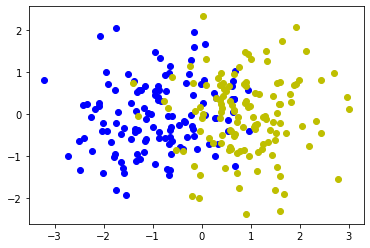

[ 0.          1.84675532 -0.73499981]


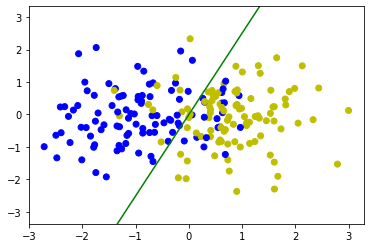

In [241]:
data , Y =gen_dataset(math.sqrt(0.75))
X_train, X_test, y_train, y_test = train_test_split(data, Y, test_size=0.2, random_state=42, stratify=Y)
weights=perceptron(X_train,y_train)

**Question 3 :** Compute the accuracy of the classification on the test set. Plot the decision boundary on the test set

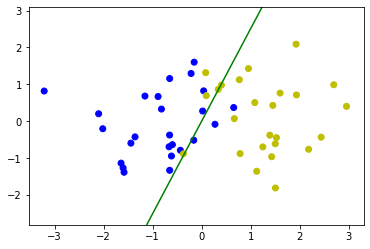

accuracy =  0.86


In [242]:
accuracy = 1 -predict(X_test,y_test , weights)


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
x0_1 = np.amin(X_train[:, 1])
x0_2 = np.amax(X_train[:, 1])

x1_1 = (-weights[1] * x0_1 - weights[0]) / weights[2]
x1_2 = (-weights[1] * x0_2 - weights[0]) / weights[2]

col = np.where(y_test[:, 0]<1,'b',"y")
plt.scatter(X_test[:, 1], X_test[:, 2], color = col)
ax.plot([x0_1, x0_2], [x1_1, x1_2], "g")

    
ymin = np.amin(X_test[:, 2])
ymax = np.amax(X_test[:, 2])
ax.set_ylim([ymin -1, ymax + 1 ])

plt.show()
print("accuracy = " , accuracy)